/Users/hliddiard/Developer/web/daily-bruin/uc-salaries/lib/python3.4/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


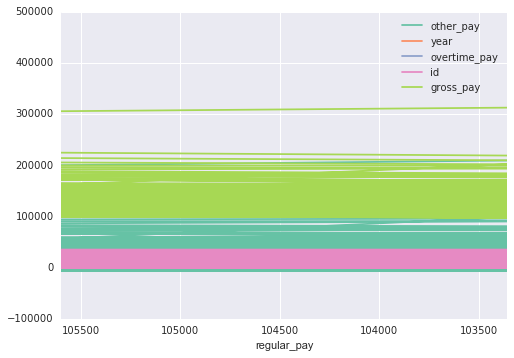

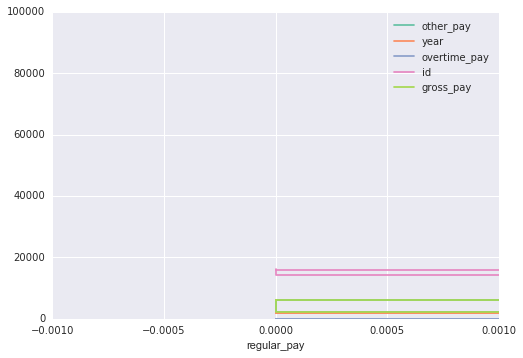

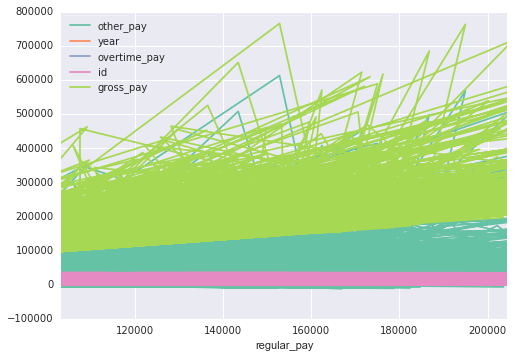

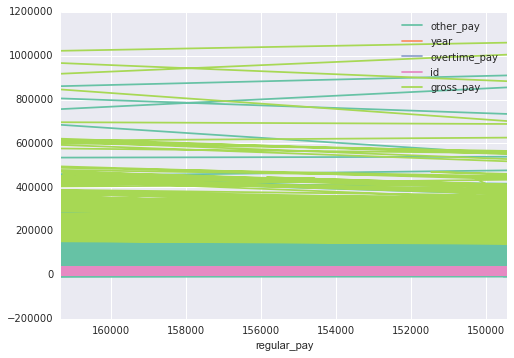

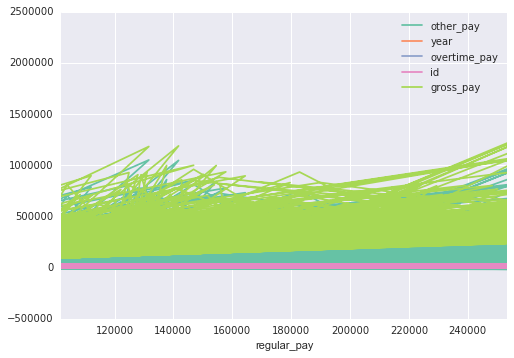

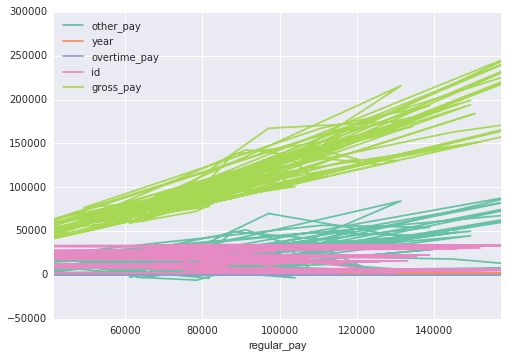

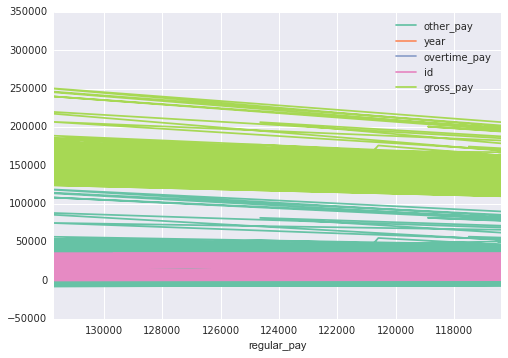

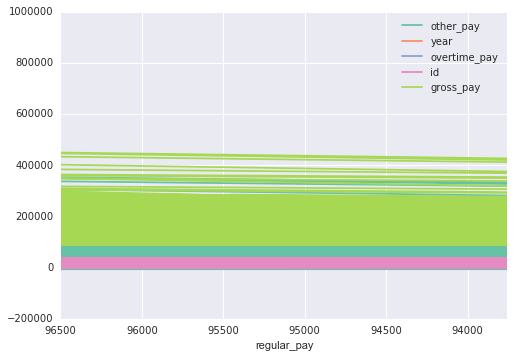

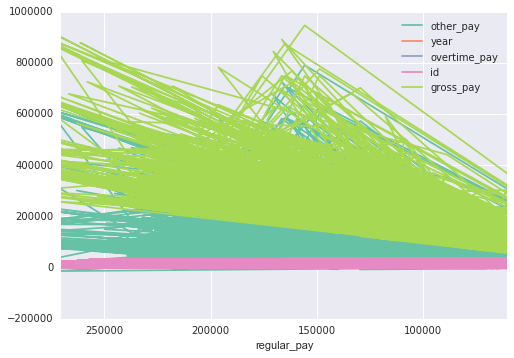

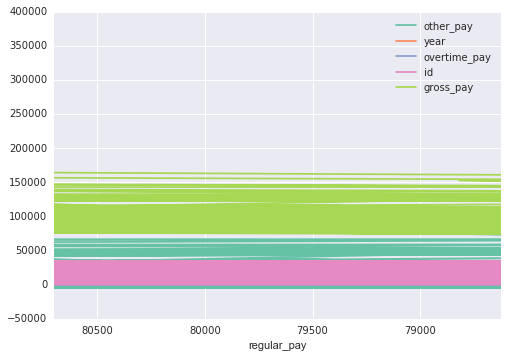

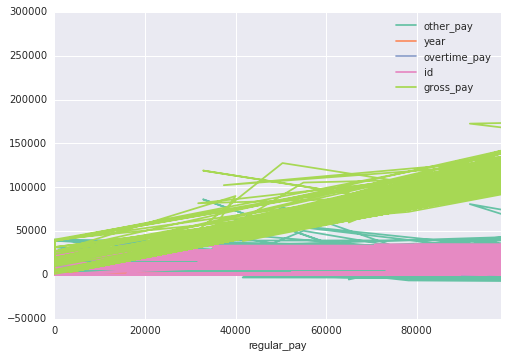

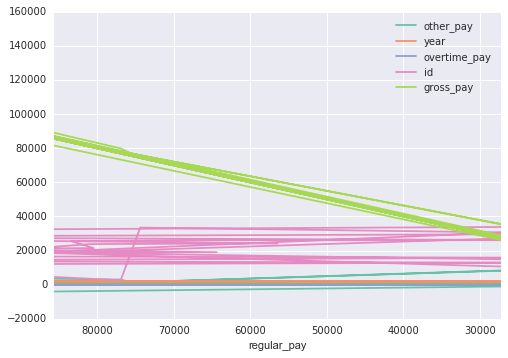

In [8]:
# show graphs inline in jupyter notebook
%matplotlib inline

import sqlite3

# seaborn imports
# https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns

# connect to database
conn = sqlite3.connect("data/uc_salaries.sqlite3")

# make graphs pretty
sns.set(color_codes=True)
sns.set_palette("Set2", 12)

# get a list of all the universities
universities = pd.read_sql("SELECT DISTINCT location FROM salaries", conn)

for index, row in universities.iterrows():
    # get all salaries from one university
    salaries = pd.read_sql("SELECT * FROM salaries WHERE location LIKE '{university}%' AND "
                           "title LIKE '%PROF%';".format(university=row['location']), conn)
    salaries.set_index('regular_pay').plot()
